# Motion Prototype Generation

Example usage of motion prototype generator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from src.actprogen import effect_based_prototypes

## Data Load

In [2]:
df_data = pd.read_csv("data/motion_samples.csv")
df_data = df_data[df_data['robot_in_map'] == True]
df_data = df_data.sample(n=2000,random_state=42)

## Effect and Motion Dimensions

In [3]:
effect_dims = ['dy','dz']
motion_dims = ['magnitude', 'angle']

## Prototype Generation

In [4]:
prototype_generator = effect_based_prototypes.ActionPrototypes(df_data, motion_dims)
prototype_generator.generate(effect_dimensions=effect_dims, prototypes_per_cluster=5)
print(prototype_generator.action_prototypes)

Max prototypes per cluster:  [1. 4. 5. 4. 1. 4.]
[[521.8232493   28.05258621]
 [848.41713871  82.88076735]
 [698.16241135  48.43849874]
 [621.07208404  76.9551266 ]
 [544.01303939  61.54599217]
 [754.12951046  85.31270778]
 [605.97481974  45.22403829]
 [476.95190878  81.22423365]
 [395.44677558  52.89289059]
 [345.24964114  68.28849159]
 [808.9102814   83.64662295]
 [588.981294    48.50960837]
 [594.2777138   80.75474586]
 [446.20875689  65.06076045]
 [239.82361635  53.66581633]
 [843.23523148  81.62361195]
 [638.96948815  72.2533594 ]]


## Visualitation

In [5]:
colors = ['red', 'green', 'blue', 'magenta', 'yellow', 'pink', 'cyan']

def color_picker(x):
    return colors[x]

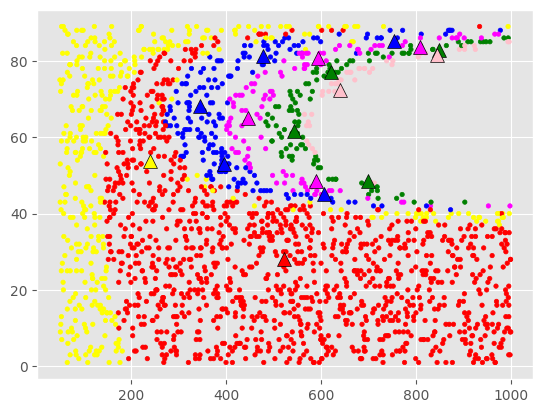

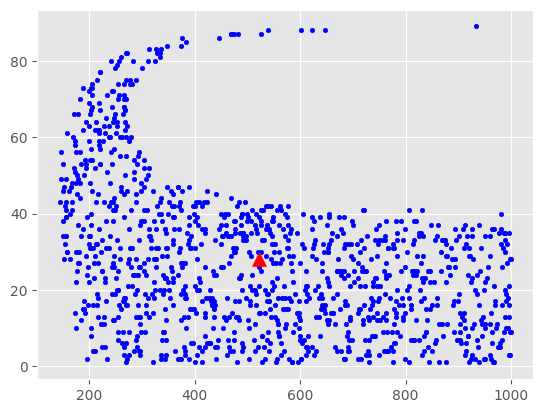

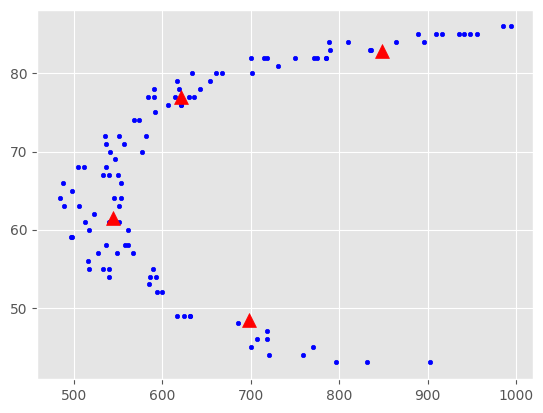

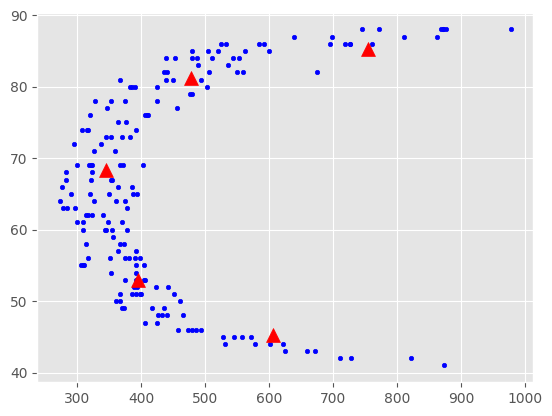

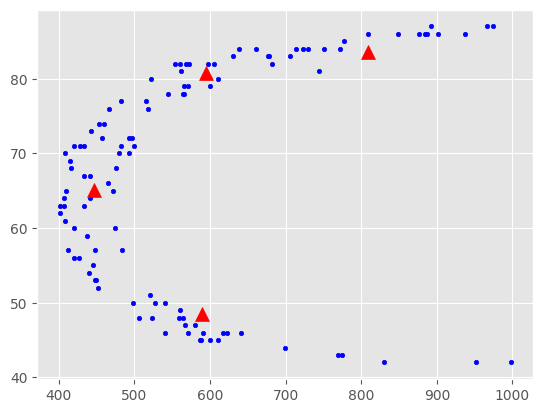

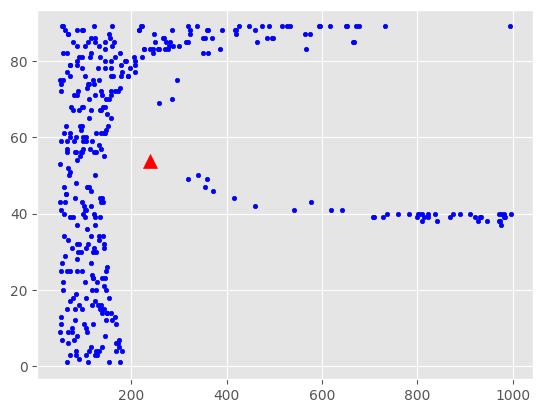

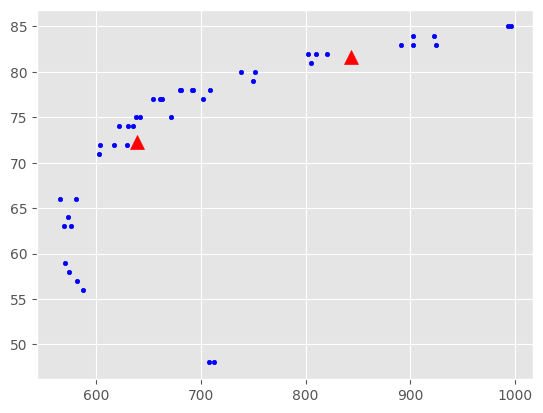

In [6]:
plt.scatter(df_data.magnitude, df_data.angle, c=list(map(color_picker,prototype_generator.m_samples_labeled['cluster_label'])), s=10)

for i, label in enumerate(set(prototype_generator.m_samples_labeled['cluster_label'])):
    local_ap = prototype_generator.prototypes_per_label[label]      
    plt.scatter(local_ap.T[0], local_ap.T[1], marker="^", s=100, color=colors[i], edgecolors='black')
plt.show()